In [8]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.utilities.distribution import MultiprocessingDistributor
import os

with h5py.File('train.h5', 'r') as f:
    X = f['x'][:]
    Y = f['y'][:]

print(X.shape)
print(Y.shape)

# Convierte X a un DataFrame de pandas
df_X = pd.DataFrame(X.reshape(-1, X.shape[-1]))

# Convierte Y a un DataFrame de pandas
df_Y = pd.DataFrame(Y, columns=['Target'])

# Une los dos DataFrames
df = pd.concat([df_X, df_Y], axis=1)

# print(df)

num_trials = 18530

df_tsfresh = pd.DataFrame({
    'id': np.repeat(df.index, num_trials),
    'time': np.tile(np.arange(num_trials), len(df)),
    'value': df.drop(columns='Target').values.flatten()
})
#print(df_tsfresh)

#print quantity of zeros and ones
#print(df_Y['Target'].value_counts())

(204, 1, 18530)
(204,)


In [13]:
with h5py.File("train.h5", "r") as f:
    X = f["x"][:]
    Y = f["y"][:]
    X = np.array([i[0] for i in X])

# print(type(Y))
# print(X.shape)
# print(Y.shape)

# print(X)

select_features = 100

# Reduce features
from sklearn.decomposition import PCA

pca = PCA(n_components=select_features)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

# Convierte X a un DataFrame de pandas
df_X = pd.DataFrame(X_pca.reshape(-1, X_pca.shape[-1]))


# Convierte Y a un DataFrame de pandas
df_Y = pd.DataFrame(Y, columns=["Target"])

# Une los dos DataFrames
df = pd.concat([df_X, df_Y], axis=1)

# print(df)


df_tsfresh = pd.DataFrame(
    {
        "id": np.repeat(df.index, select_features),
        "time": np.tile(np.arange(select_features), len(df)),
        "value": df.drop(columns="Target").values.flatten(),
    }
)
print(df_tsfresh.shape)

(204, 100)
(20400, 3)


In [14]:
Distributor = MultiprocessingDistributor(n_workers=os.cpu_count(), disable_progressbar=False, progressbar_title="Feature Extraction")


features = extract_features(df_tsfresh, column_id='id', column_sort='time', distributor=Distributor, default_fc_parameters=EfficientFCParameters())
print(features)

Feature Extraction: 100%|██████████| 102/102 [00:03<00:00, 33.16it/s]


     value__variance_larger_than_standard_deviation  value__has_duplicate_max  \
0                                               0.0                       0.0   
1                                               0.0                       0.0   
2                                               0.0                       0.0   
3                                               0.0                       0.0   
4                                               0.0                       0.0   
..                                              ...                       ...   
199                                             0.0                       0.0   
200                                             0.0                       0.0   
201                                             0.0                       0.0   
202                                             0.0                       0.0   
203                                             1.0                       0.0   

     value__has_duplicate_m

              precision    recall  f1-score   support

           0       0.87      0.72      0.79        46
           1       0.46      0.69      0.55        16

    accuracy                           0.71        62
   macro avg       0.66      0.70      0.67        62
weighted avg       0.76      0.71      0.72        62

0.7096774193548387


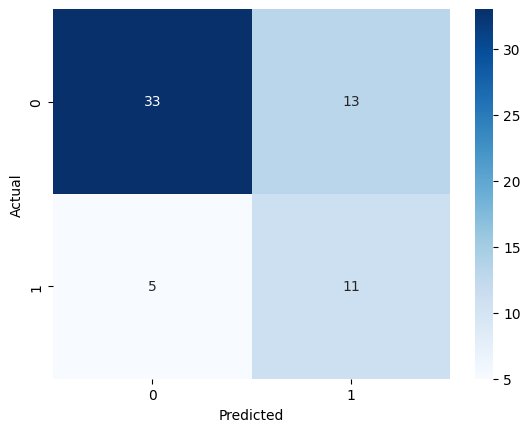

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Asume que 'features' es tu DataFrame con las características extraídas y 'df_Y' es tu DataFrame con las etiquetas
X = features
y = df_Y['Target']

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

clf = KNeighborsClassifier(n_neighbors=3)

# Entrena el clasificador
clf.fit(X_train, y_train)

# Haz predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Imprime un informe de clasificación
print(classification_report(y_test, y_pred))

#get accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

#create confusion matrix
from sklearn.metrics import confusion_matrix

#plot confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
